In [47]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy import stats
import statsmodels.api as sm
import warnings
import os
from itertools import product
from datetime import datetime
from dateutil.parser import parse
warnings.filterwarnings('ignore')
plt.style.use('seaborn-poster')
from statsmodels.tsa.arima.model import ARIMA

In [48]:

df = pd.read_csv('C:\\Users\\ginte\\OneDrive\\Pulpit\\Komp analiza szeregów czasowych\\projekt2\\data.csv')

In [49]:
df.head()

,Timestamp,Date,Symbol,Open,High,Low,Close,Volume BTC,Volume USD
0,1675643280000,2023-02-06 00:28:00,BTC/USD,23044.91,23055.19,23044.91,23055.19,0.002834,65.331953
1,1675643220000,2023-02-06 00:27:00,BTC/USD,23025.00,23044.91,23025.00,23044.91,0.038246,881.364566
2,1675643160000,2023-02-06 00:26:00,BTC/USD,23025.00,23025.00,23025.00,23025.00,1.417933,32647.907095
3,1675643100000,2023-02-06 00:25:00,BTC/USD,23024.81,23025.00,23024.81,23025.00,0.073732,1697.668018
4,1675643040000,2023-02-06 00:24:00,BTC/USD,23020.17,23024.99,23020.17,23024.81,0.024029,553.252568


In [50]:
df.index = df.Date.apply(lambda x : parse(x))
df.head()

,Timestamp,Date,Symbol,Open,High,Low,Close,Volume BTC,Volume USD
Date,,,,,,,,,
2023-02-06 00:28:00,1675643280000,2023-02-06 00:28:00,BTC/USD,23044.91,23055.19,23044.91,23055.19,0.002834,65.331953
2023-02-06 00:27:00,1675643220000,2023-02-06 00:27:00,BTC/USD,23025.00,23044.91,23025.00,23044.91,0.038246,881.364566
2023-02-06 00:26:00,1675643160000,2023-02-06 00:26:00,BTC/USD,23025.00,23025.00,23025.00,23025.00,1.417933,32647.907095
2023-02-06 00:25:00,1675643100000,2023-02-06 00:25:00,BTC/USD,23024.81,23025.00,23024.81,23025.00,0.073732,1697.668018
2023-02-06 00:24:00,1675643040000,2023-02-06 00:24:00,BTC/USD,23020.17,23024.99,23020.17,23024.81,0.024029,553.252568


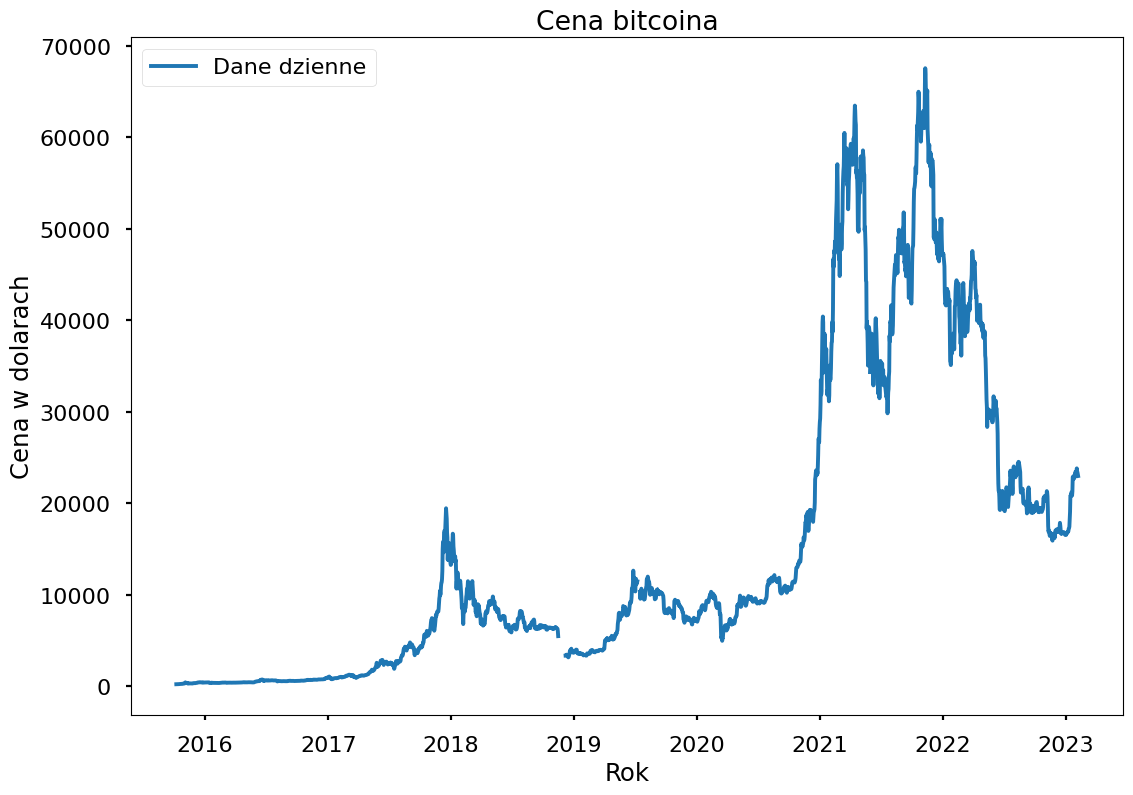

In [51]:
# Unix-time to 
# df.Timestamp = pd.to_datetime(df.Timestamp, unit='s')

# Resampling to daily frequency
# df.index = df.Timestamp
df = df.resample('D').mean()

# Resampling to monthly frequency
df_week = df.resample('W-MON').mean()

plt.plot(df.Open, '-', label='Dane dzienne')
plt.title("Cena bitcoina")
plt.xlabel("Rok")
plt.ylabel("Cena w dolarach")
plt.legend()
plt.show()


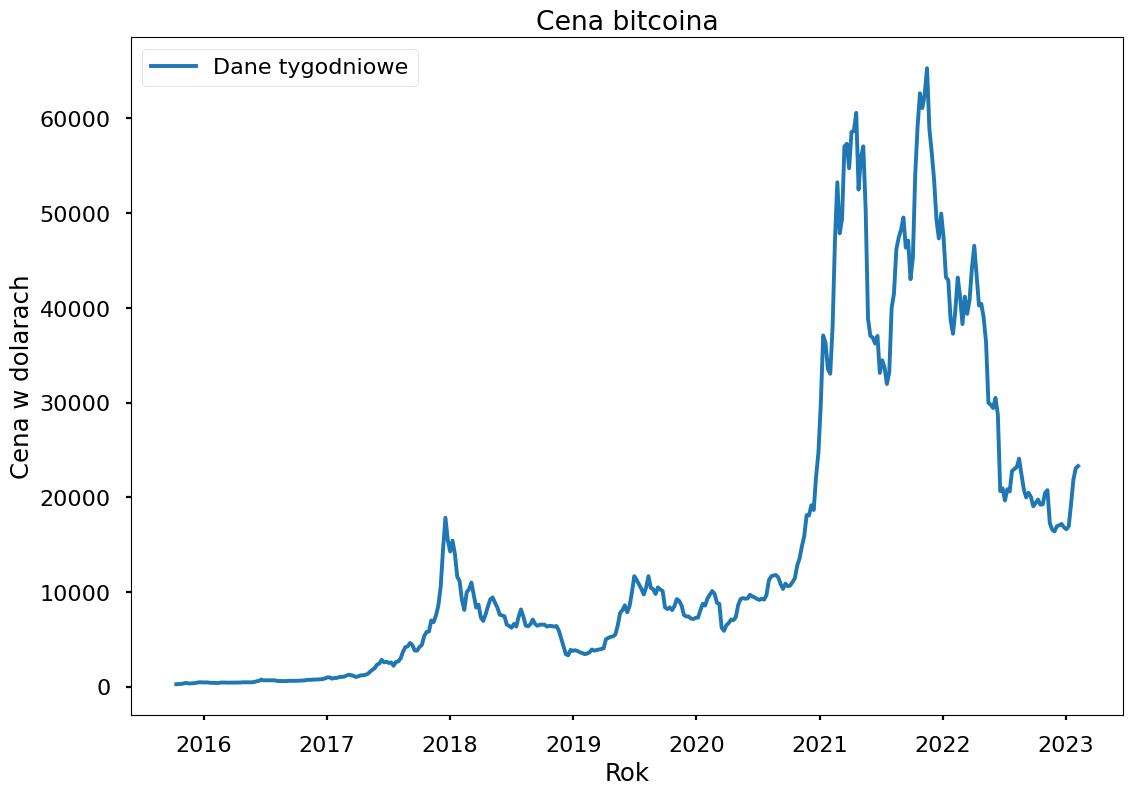

In [52]:
plt.plot(df_week.interpolate().Open, '-', label='Dane tygodniowe')
plt.title("Cena bitcoina")
plt.xlabel("Rok")
plt.ylabel("Cena w dolarach")
plt.legend()
plt.show()

In [53]:
df_week.interpolate()

,Timestamp,Open,High,Low,Close,Volume BTC,Volume USD
Date,,,,,,,
2015-10-12,1.444483e+09,245.683627,245.765741,245.680627,245.762828,0.034223,8.430618
2015-10-19,1.444997e+09,261.385183,261.417109,261.354939,261.387041,0.170962,44.826798
2015-10-26,1.445602e+09,279.690151,279.703955,279.678183,279.692354,0.253157,70.620655
2015-11-02,1.446206e+09,317.177835,317.238088,317.126754,317.185222,0.927195,302.164270
2015-11-09,1.446811e+09,393.957731,394.154911,393.759957,393.959130,0.996063,401.787583
...,...,...,...,...,...,...,...
2023-01-09,1.673006e+12,16897.794068,16899.435966,16896.070062,16897.847816,0.293451,4964.818987
2023-01-16,1.673611e+12,19260.651939,19267.184962,19254.635791,19261.047377,0.462253,8977.811948
2023-01-23,1.674216e+12,21858.909497,21865.539925,21852.365076,21859.082764,0.344199,7490.777590


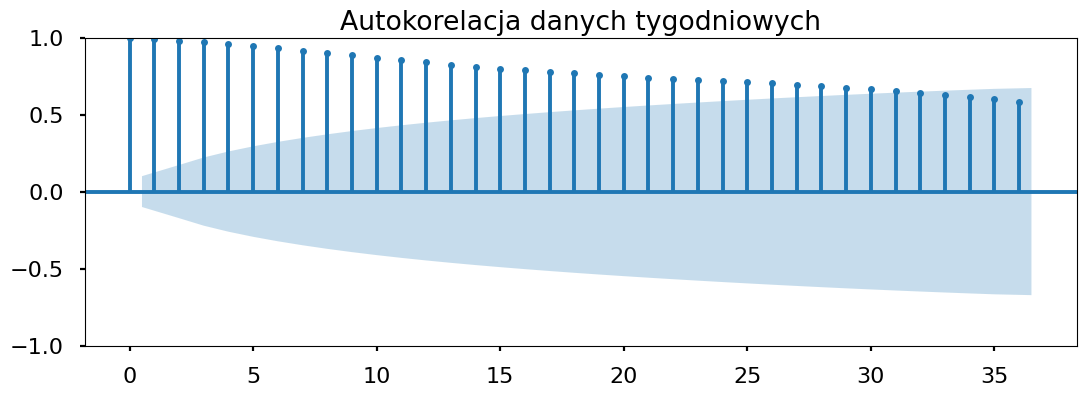

In [66]:
# Initial approximation of parameters using Autocorrelation and Partial Autocorrelation Plots
# plt.figure(figsize=(8,7))
ax = plt.subplot(211)
sm.graphics.tsa.plot_acf(df_week.interpolate().Open.values.squeeze(), lags=36, ax=ax)
plt.title("Autokorelacja danych tygodniowych")
plt.show()

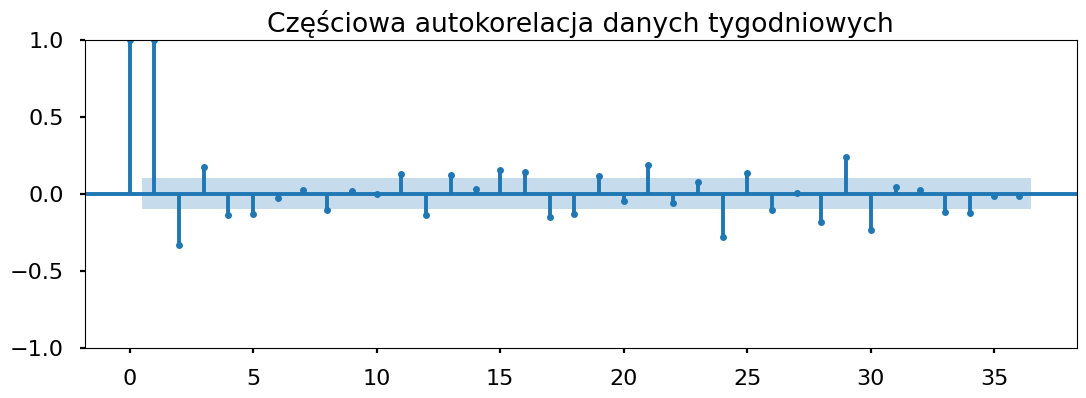

In [55]:
ax = plt.subplot(212)
sm.graphics.tsa.plot_pacf(df_week.interpolate().Open.values.squeeze(), lags=36, ax=ax)
plt.title("Częściowa autokorelacja danych tygodniowych")
plt.show()

In [56]:
print("Dickey–Fuller test: p=%f" % sm.tsa.stattools.adfuller(df_week.interpolate().Open)[1])

Dickey–Fuller test: p=0.517773


In [57]:
# Box-Cox Transformations
df_week['xdd'], lmbda = stats.boxcox(df_week.interpolate().Open)
lmbda

0.18214966662058923

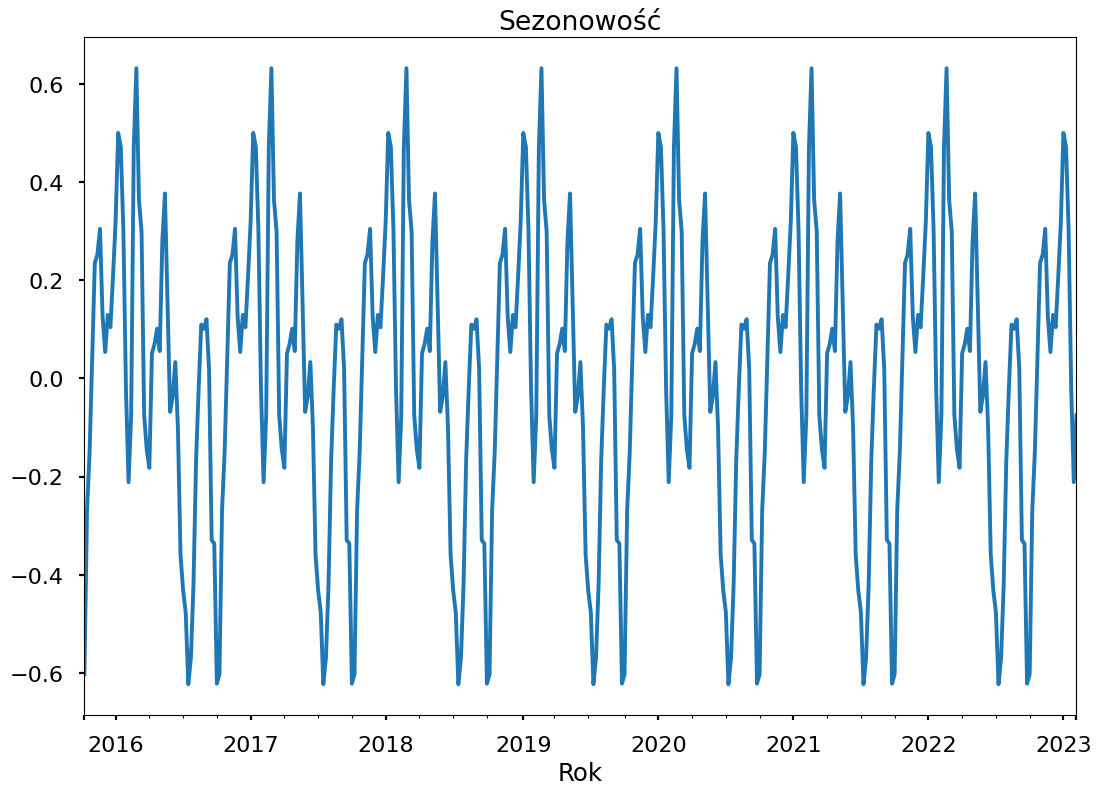

In [77]:
kek = sm.tsa.seasonal_decompose(df_week.xdd)
kek.seasonal.plot()
plt.title("Sezonowość")
plt.xlabel("Rok")
plt.show()

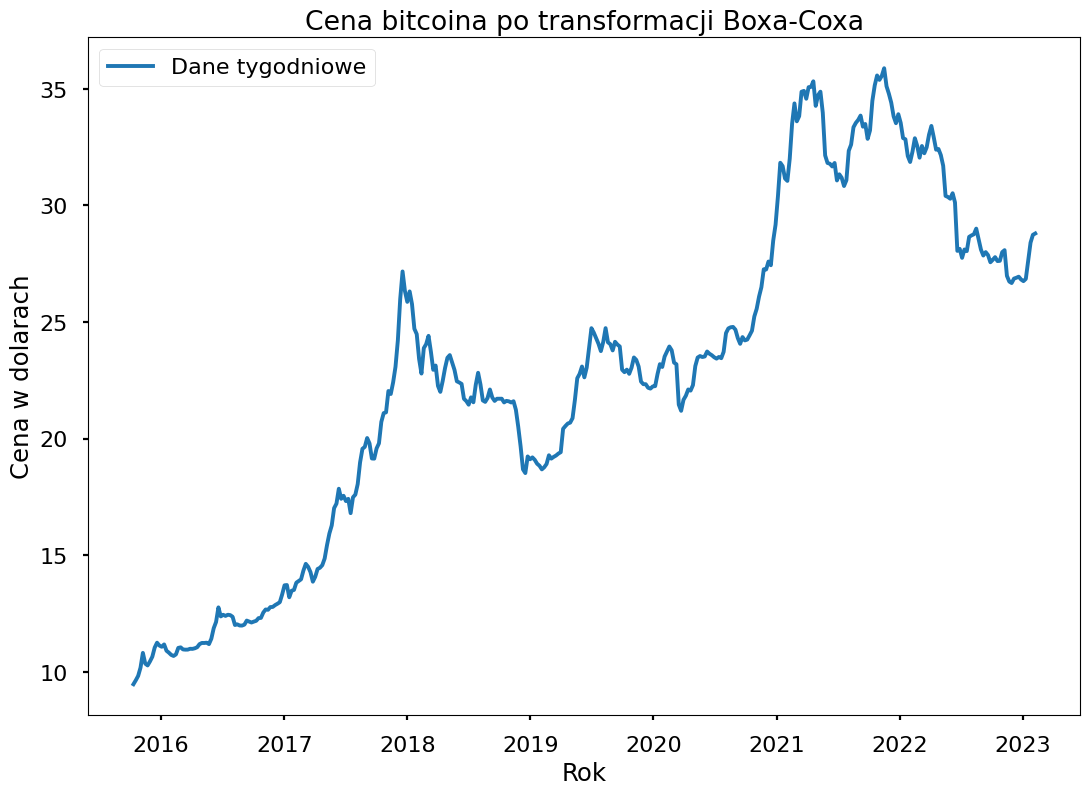

In [58]:
plt.plot(df_week.interpolate().xdd, '-', label='Dane tygodniowe')
plt.title("Cena bitcoina po transformacji Boxa-Coxa")
plt.xlabel("Rok")
plt.ylabel("Cena w dolarach")
plt.legend()
plt.show()

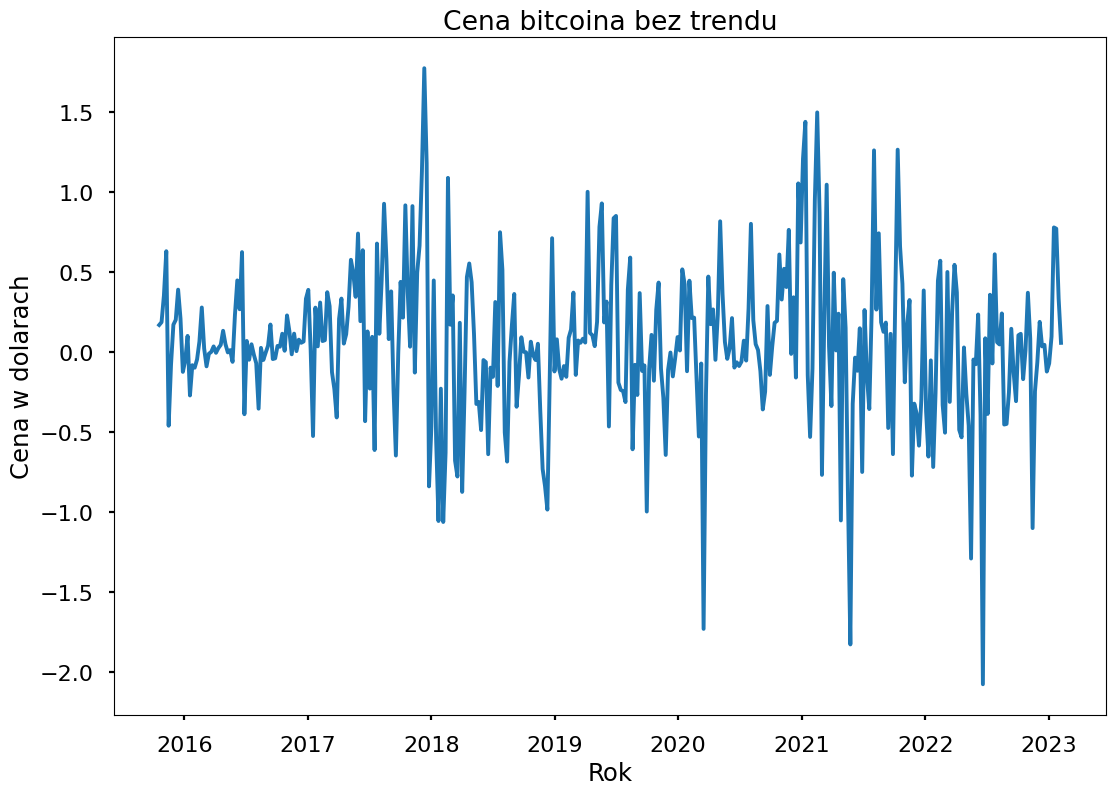

In [59]:
# Regular differentiation
df_week['bez_trend'] = df_week.interpolate().xdd - df_week.interpolate().xdd.shift(1)

# skr3 = sm.tsa.seasonal_decompose(df_week.interpolate().bez_trend[1:])
# skr3.observed.plot()

plt.plot(df_week.bez_trend)
plt.title("Cena bitcoina bez trendu")
plt.ylabel("Cena w dolarach")
plt.xlabel("Rok")
plt.show()
plt.show()

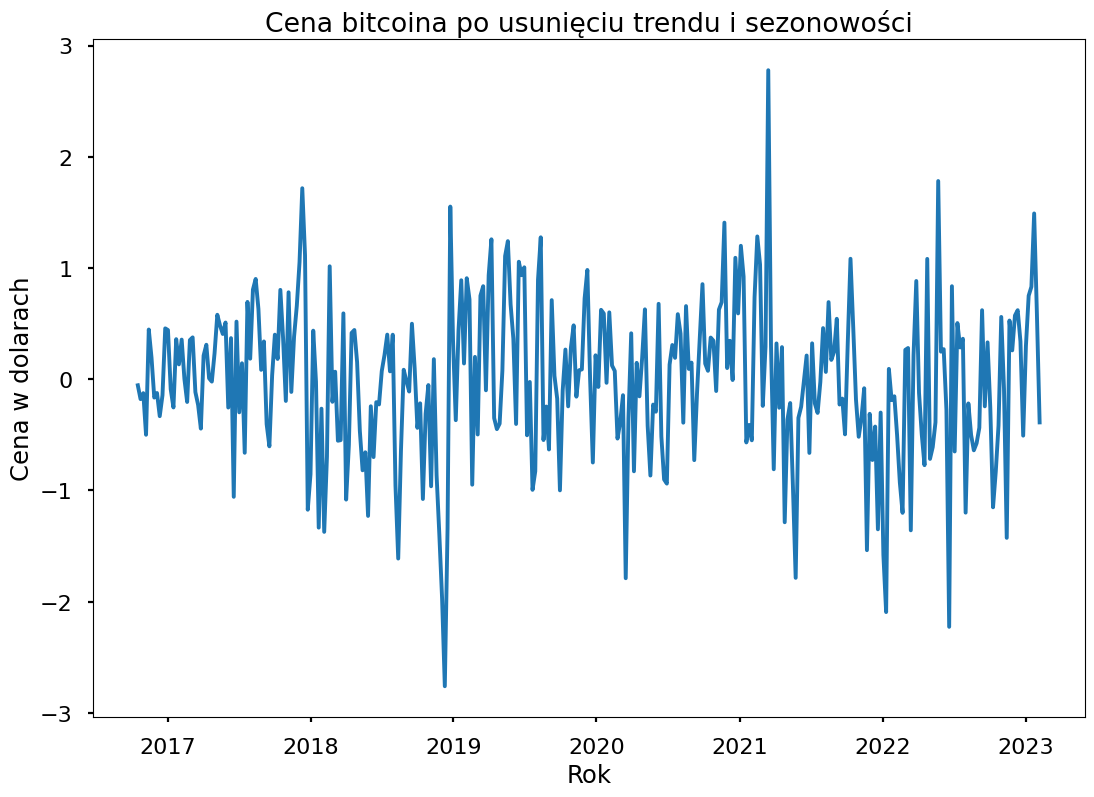

In [60]:
df_week['bez_niczego'] = df_week.interpolate().bez_trend - df_week.interpolate().bez_trend.shift(52)

# Regular differentiation
#df_week['bez_niczego'] = df_week.interpolate().bez_sez - df_week.interpolate().bez_sez

plt.plot(df_week.bez_niczego)
plt.title("Cena bitcoina po usunięciu trendu i sezonowości")
plt.ylabel("Cena w dolarach")
plt.xlabel("Rok")
plt.show()
plt.show()

In [70]:
print("Dickey–Fuller test: p=%f" % sm.tsa.stattools.adfuller(df_week.bez_niczego[53:])[1])

Dickey–Fuller test: p=0.000000


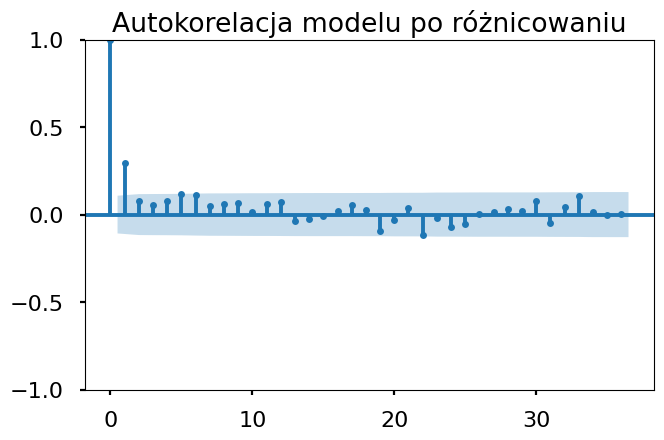

In [72]:
# Initial approximation of parameters using Autocorrelation and Partial Autocorrelation Plots
plt.figure(figsize=(25,10))
ax = plt.subplot(231)
sm.graphics.tsa.plot_acf(df_week.bez_niczego[53:].values.squeeze(), lags=36, ax=ax)
plt.title("Autokorelacja modelu po różnicowaniu")
plt.show()

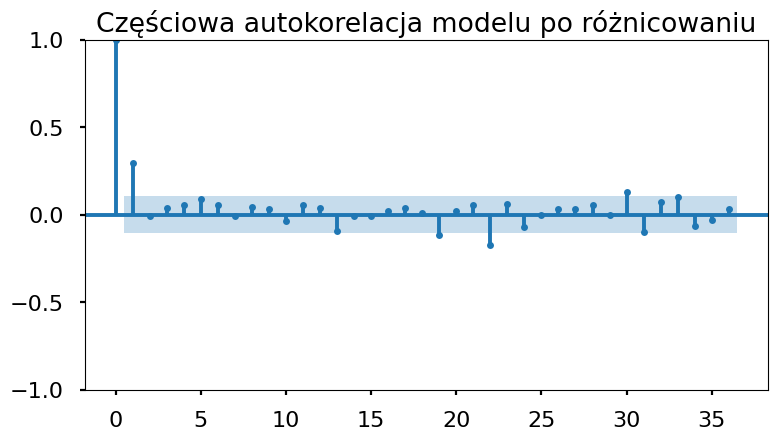

In [73]:
plt.figure(figsize=(30,10))
ax = plt.subplot(232)
sm.graphics.tsa.plot_pacf(df_week.bez_niczego[53:].values.squeeze(), lags=36, ax=ax)
plt.title("Częściowa autokorelacja modelu po różnicowaniu")
plt.show()

In [78]:
# Initial approximation of parameters
# Qs = range(0, 2)
# Ps = range(0, 2)
qs = range(0, 11)
ps = range(0, 11)
# D=1
d=0
parameters = product(ps, qs)
parameters_list = list(parameters)
len(parameters_list)

# Model Selection
results = []
best_aic = float("inf")
warnings.filterwarnings('ignore')
for param in parameters_list:
    try:
        model = ARIMA(df_week.xdd, order=(param[0], d, param[1])).fit()
        # model=sm.tsa.statespace.SARIMAX(df_week.xdd, order=(param[0], d, param[1]), 
        #                               seasonal_order=(param[2], D, param[3], 48)).fit(disp=-1)
    except ValueError:
        print('wrong parameters:', param)
        continue
    aic = model.aic
    if aic < best_aic:
        best_model = model
        best_aic = aic
        best_param = param
    results.append([param, model.aic])

In [79]:
# Best Models
result_table = pd.DataFrame(results)
result_table.columns = ['parameters', 'aic']
print(result_table.sort_values(by = 'aic', ascending=True).head())
print(best_model.summary())

   parameters         aic
22     (2, 0)  490.605579
23     (2, 1)  492.259820
33     (3, 0)  492.282006
12     (1, 1)  492.301251
13     (1, 2)  492.337584
                               SARIMAX Results                                
Dep. Variable:                    xdd   No. Observations:                  383
Model:                 ARIMA(2, 0, 0)   Log Likelihood                -241.303
Date:                Wed, 08 Feb 2023   AIC                            490.606
Time:                        17:28:04   BIC                            506.398
Sample:                    10-12-2015   HQIC                           496.870
                         - 02-06-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         20.7071      5.929      3.492      0.000

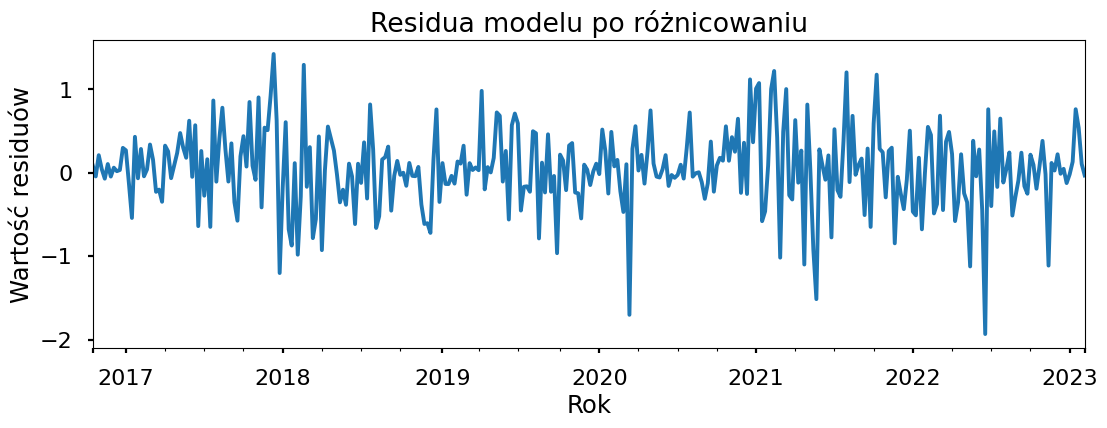

In [80]:
# STL-decomposition
plt.subplot(211)
best_model.resid[53:].plot()
plt.ylabel("Wartość residuów")
plt.xlabel("Rok")
plt.title("Residua modelu po różnicowaniu")
plt.show()

In [81]:
mu = np.mean(best_model.resid[53:])
mu

0.041719893224093044

In [82]:
from scipy import stats
stats.shapiro(best_model.resid[53:])

ShapiroResult(statistic=0.979788064956665, pvalue=0.00013503243098966777)

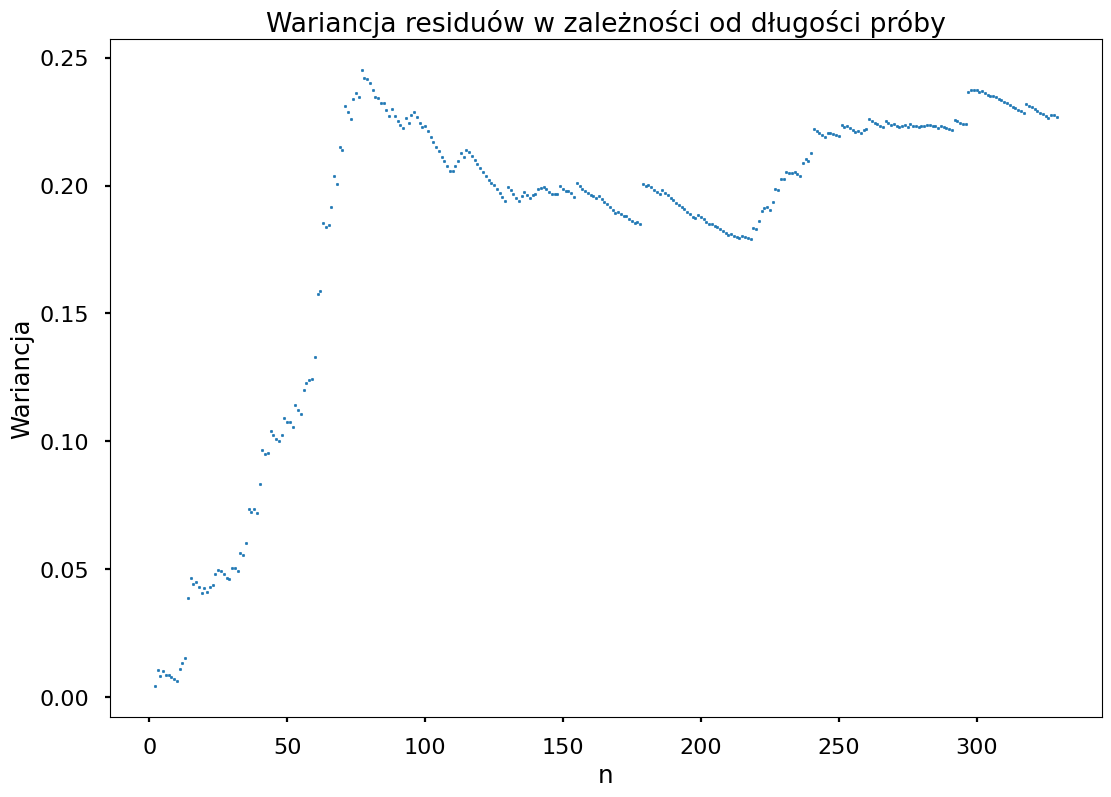

In [83]:
e = best_model.resid[53:]
t232=[i for i in range(2, len(e))]
war=[np.var(e[:i]) for i in range(2, len(e))]
plt.title("Wariancja residuów w zależności od długości próby")
plt.ylabel("Wariancja")
plt.xlabel("n")
plt.scatter(t232,war,s=3)
plt.show()

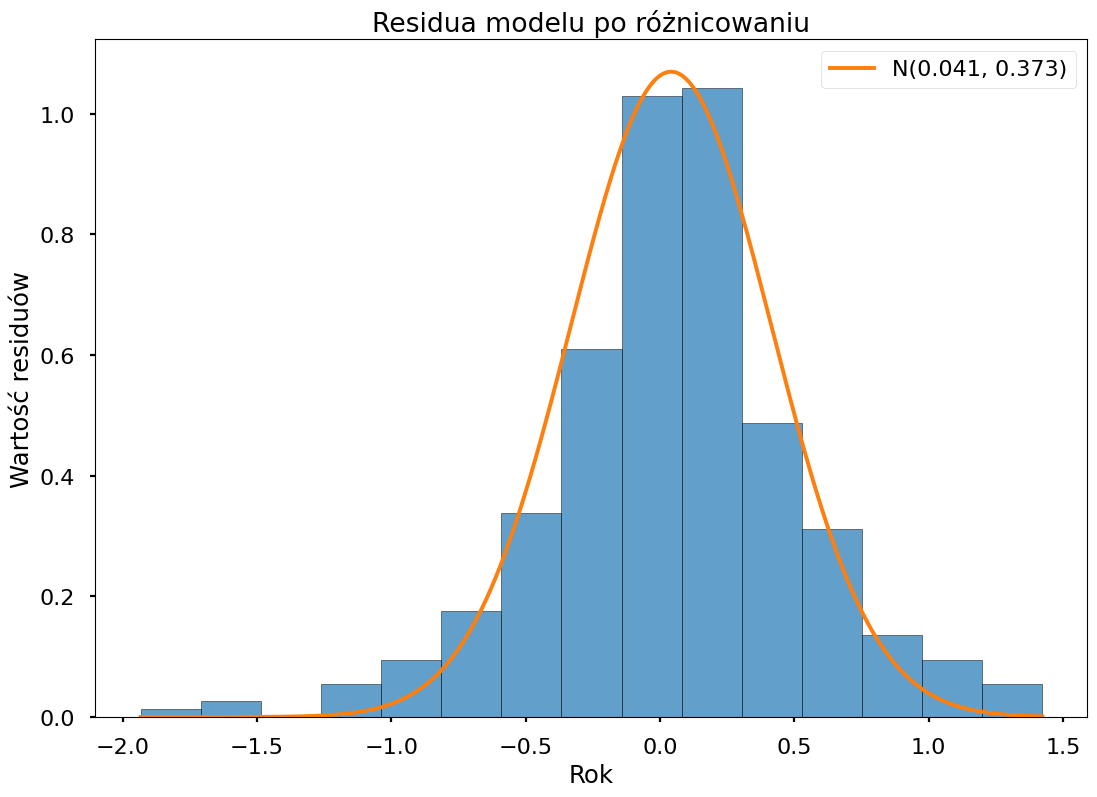

In [84]:
# from distfit import distfit
# dist = distfit()
# model = dist.fit_transform(best_model.resid[49:])
# dist.plot()
from scipy.stats import norm

plt.hist(best_model.resid[53:], bins=15, alpha=0.7, edgecolor='k', density=True)
t = np.linspace(min(best_model.resid[49:]), max(best_model.resid[49:]), 1000)

plt.plot(t, norm.pdf(t, loc=0.041, scale=0.373), label="N(0.041, 0.373)")

plt.ylabel("Wartość residuów")
plt.xlabel("Rok")
plt.title("Residua modelu po różnicowaniu")
plt.legend()
plt.show()

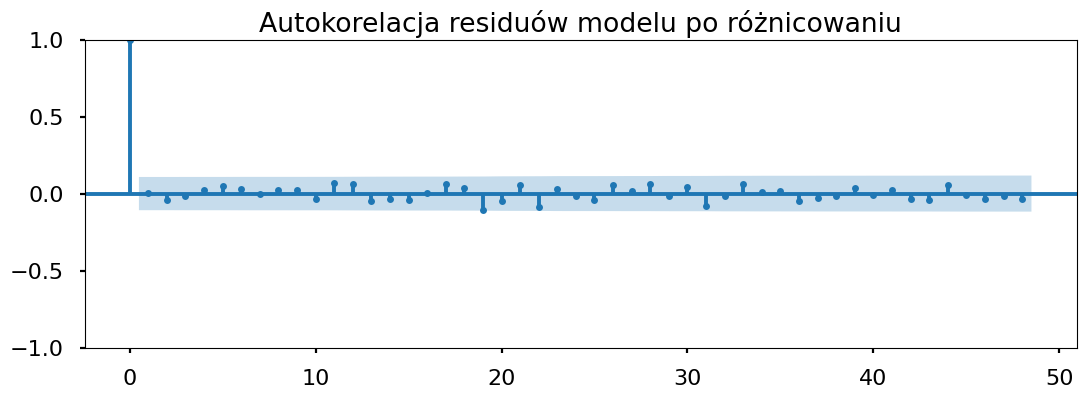

In [85]:
ax = plt.subplot(212)
sm.graphics.tsa.plot_acf(best_model.resid[53:].values.squeeze(), lags=48, ax=ax)
plt.title("Autokorelacja residuów modelu po różnicowaniu")
plt.show()

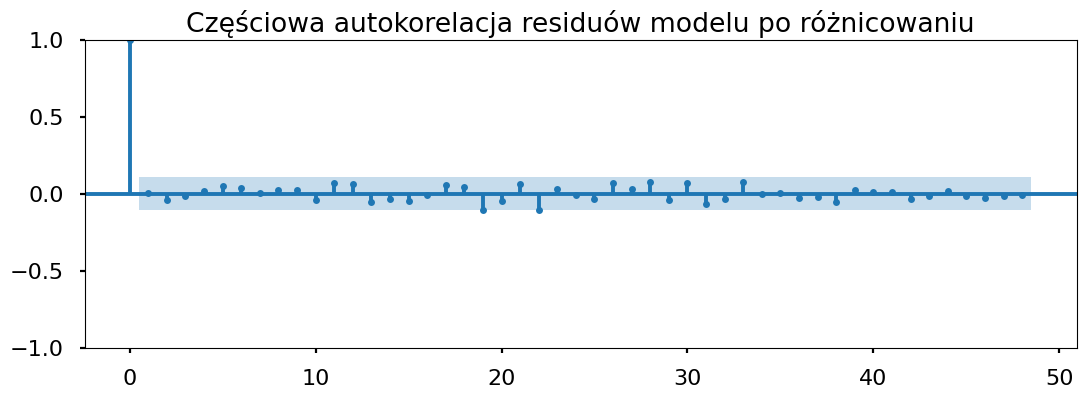

In [86]:
ax = plt.subplot(212)
sm.graphics.tsa.plot_pacf(best_model.resid[53:].values.squeeze(), lags=48, ax=ax)
plt.title("Częściowa autokorelacja residuów modelu po różnicowaniu")
plt.show()

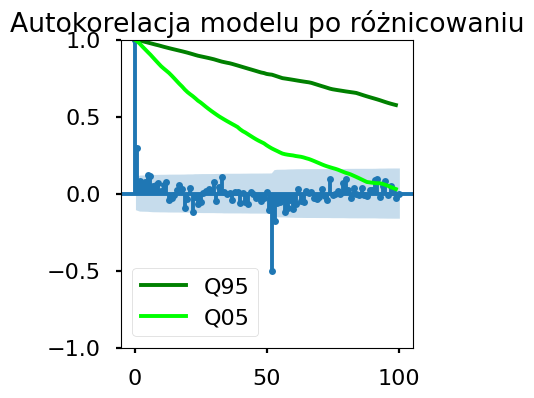

In [93]:
modele=[]
N = 100
mu = 0
sigz = 0.2032
n = 1000
fi1 = 1.3157
fi2 = -0.3177
hmax = 100

for i in range(N):
    x=[]
    z = np.random.normal(mu, sigz, n)
    for j in range(n):
        if j==0:
            x.append(-0.2)
        elif j==1:
            x.append(-0.25)
        else:
            x.append(fi2*x[j-2] + fi1*x[j-1] + z[j])
    modele.append(x)
kowar=[]
korel=[]
h = [i for i in range(hmax)]
for k in range(N):
    ec = np.zeros(len(h))
    ek = np.zeros(len(h))
    xs=np.mean(modele[k])
    for j in range(len(h)):
        il = [(modele[k][i] - xs) * (modele[k][i + h[j]] - xs) for i in range(n - h[j])]
        ec[j] = sum(il) / n
        ek[j] = ec[j] / ec[0]
    kowar.append(ec)
    korel.append(ek)
q_95c=[]
q_05c=[]
q_95k = []
q_05k = []
for i in range(hmax):
    kolumna1=[]
    kolumna2=[]
    for j in range(N):
        kolumna1.append(kowar[j][i])
        kolumna2.append(korel[j][i])
    q_95c.append(np.quantile(kolumna1,0.95))
    q_05c.append(np.quantile(kolumna1, 0.05))
    q_95k.append(np.quantile(kolumna2, 0.95))
    q_05k.append(np.quantile(kolumna2, 0.05))


ax = plt.subplot(231)
sm.graphics.tsa.plot_acf(df_week.bez_niczego[53:].values.squeeze(), lags=100, ax=ax)
plt.title("Autokorelacja modelu po różnicowaniu")
plt.plot(h, q_95k, c="green",label="Q95")
plt.plot(h, q_05k, c="lime",label="Q05")
#plt.scatter(h, korel[20], s=14,label="Empiryczna")
plt.legend()
plt.show()